In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

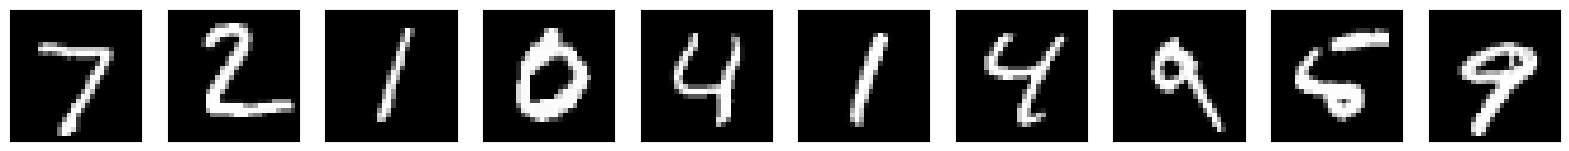

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D,Reshape

In [5]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3),
                 input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## THIRD SET OF LAYERS
# CONVOLUTIONAL LAYER
#encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
#encode_model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8,activation="relu"))
encode_model.add(Dense(30,activation="relu"))

In [6]:
############
# Decoding #
############
decode_model=Sequential()

# DeConv1
#decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
#decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv2
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv3
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [7]:
autoencoder = Sequential([encode_model, decode_model])
#autoencoder.add(encode_model)
#autoencoder.add(decode_model)

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                167166    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         14049     
                                                                 
Total params: 181215 (707.87 KB)
Trainable params: 181215 (707.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
encode_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 392)               1

In [11]:
decode_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 392)               12152     
                                                                 
 reshape (Reshape)           (None, 7, 7, 8)           0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 28, 28, 16)        0         
 g2D)                                                 

In [12]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [14]:
# Train the model
autoencoder.fit(x=x_train, y=x_train,
                epochs=10,
                batch_size=128,
                shuffle=True, verbose=1,
                validation_data=(x_test, x_test),
               )

Epoch 1/10

469/469 [==============================] - 10s 17ms/step - loss: 0.6940 - val_loss: 0.6933
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.6924 - val_loss: 0.6916
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6906 - val_loss: 0.6895
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.6882 - val_loss: 0.6869
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6852 - val_loss: 0.6836
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6815 - val_loss: 0.6793
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6765 - val_loss: 0.6736
Epoch 8/10
469/469 [==============================] - 8s 17ms/step - loss: 0.6699 - val_loss: 0.6659
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.6605 - val_loss: 0.6549
Epoch 10/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6471 - val_

313/313 [==============================] - 1s 2ms/step


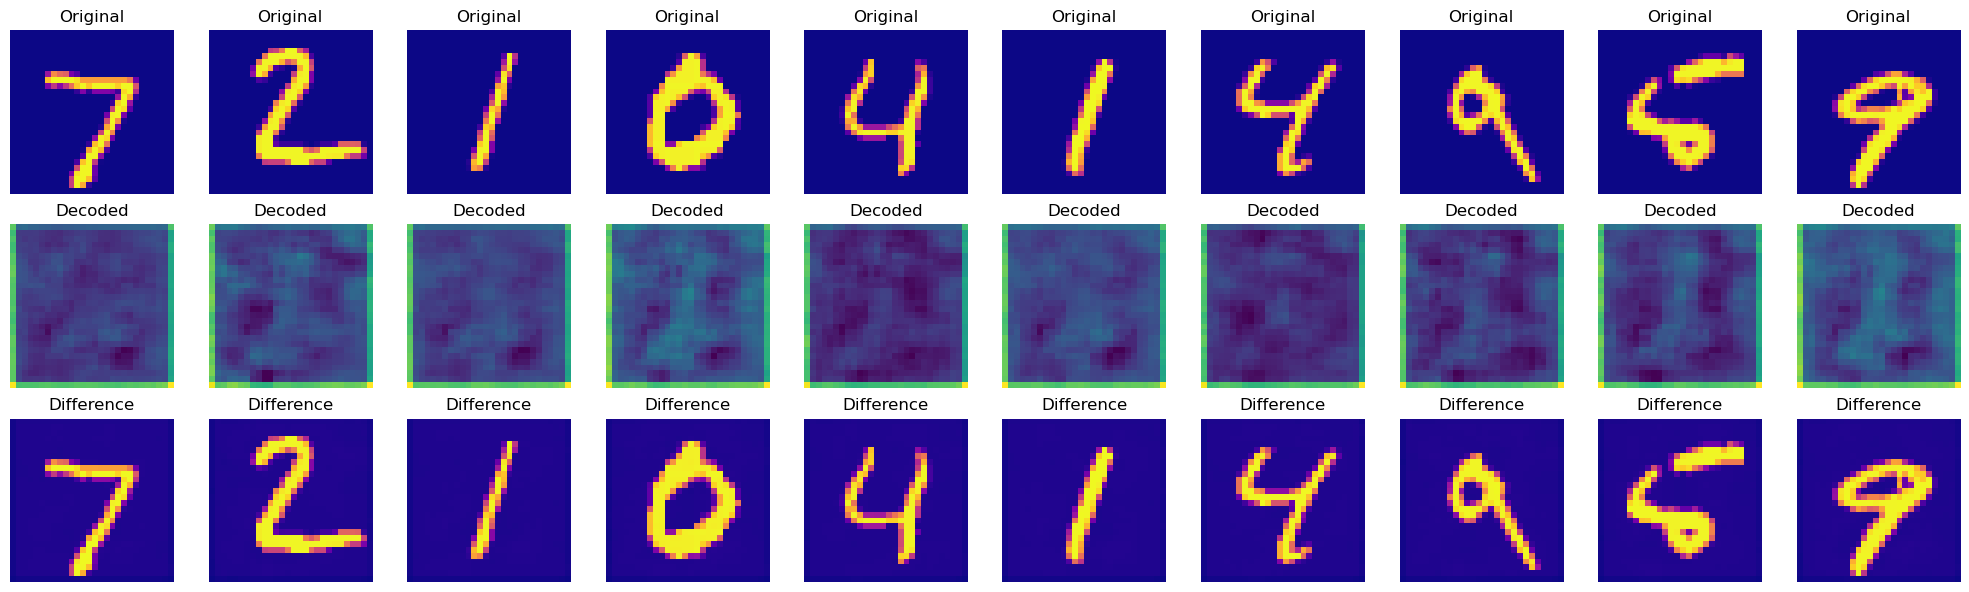

In [20]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='plasma')
    plt.title("Original")
    plt.axis('off')

    # Decoded Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='viridis')
    plt.title("Decoded")
    plt.axis('off')

    # Difference between Original and Decoded Images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow((x_test[i] - decoded_imgs[i]).reshape(28, 28), cmap='plasma')
    plt.title("Difference")
    plt.axis('off')

plt.tight_layout()
plt.show()